In [1]:
# Create the Google Drive connection
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import the os package and list the files in MyDrive
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case'))

['test.csv', 'items.csv', 'holidays_events.csv', 'oil.csv', 'stores.csv', 'sample_submission.csv', 'transactions.csv', 'favorita-grocery-sales-forecasting.zip', 'trainprocess.csv', 'OLD train.csv', 'Tom - W1 Project Ori.ipynb', 'Copy of TS_retail_kaggle_EDA.ipynb', 'Masterschool Time Series Forecasting Assignment.pdf', '2 OLD train.csv', 'train.csv', 'Prophet with aggregation data_prep.ipynb', 'With notes LSTM data_prep.ipynb']


In [3]:
# Import the Pandas library
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
df_holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/holidays_events.csv')
display(df_holidays.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
df_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/items.csv')
display(df_items.head())

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
df_oil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/oil.csv')
display(df_oil.head())

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
df_stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/stores.csv')
display(df_stores.head())

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
df_transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/transactions.csv')
display(df_transactions.head())

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/train.csv', nrows=2e6, low_memory=False)
display(df_train.head())

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,34,115850,2013-01-02,25767.0,6.0,False,2013,1,2,2,NaN
1,30,321798,2013-01-02,23302.0,1.0,False,2013,1,2,2,NaN
2,35,819195,2013-01-02,26945.0,1.0,False,2013,1,2,2,NaN
3,24,959500,2013-01-02,19641.0,5.0,False,2013,1,2,2,NaN
4,35,683721,2013-01-02,26892.0,3.0,False,2013,1,2,2,NaN


## **EDA each datasets**

In [10]:
# df_holidays

print(f'shape : {df_holidays.shape}')
print('='*30)
print(df_holidays.info())
print('='*30)
print(f'missing values : \n{df_holidays.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_holidays.duplicated().sum()}')

shape : (350, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
missing values : 
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
duplicates : 0


In [11]:
# df_items

print(f'shape : {df_items.shape}')
print('='*30)
print(df_items.info())
print('='*30)
print(f'missing values : \n{df_items.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_items.duplicated().sum()}')

shape : (4100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None
missing values : 
item_nbr      0
family        0
class         0
perishable    0
dtype: int64
duplicates : 0


In [12]:
# df_oil

print(f'shape : {df_oil.shape}')
print('='*30)
print(df_oil.info())
print('='*30)
print(f'missing values : \n{df_oil.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_oil.duplicated().sum()}')

shape : (1218, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
missing values : 
date           0
dcoilwtico    43
dtype: int64
duplicates : 0


In [13]:
# df_stores

print(f'shape : {df_stores.shape}')
print('='*30)
print(df_stores.info())
print('='*30)
print(f'missing values : \n{df_stores.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_stores.duplicated().sum()}')

shape : (54, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
missing values : 
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
duplicates : 0


In [14]:
# df_transactions

print(f'shape : {df_transactions.shape}')
print('='*30)
print(df_transactions.info())
print('='*30)
print(f'missing values : \n{df_transactions.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_transactions.duplicated().sum()}')

shape : (83488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None
missing values : 
date            0
store_nbr       0
transactions    0
dtype: int64
duplicates : 0


In [15]:
# df_train

print(f'shape : {df_train.shape}')
print('='*30)
print(df_train.info())
print('='*30)
print(f'missing values : \n{df_train.isnull().sum()}')
print('='*30)
print(f'duplicates : {df_train.duplicated().sum()}')

shape : (300000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   store_nbr          300000 non-null  int64  
 1   item_nbr           300000 non-null  int64  
 2   date               300000 non-null  object 
 3   id                 300000 non-null  float64
 4   unit_sales         300000 non-null  float64
 5   onpromotion        300000 non-null  bool   
 6   year               300000 non-null  int64  
 7   month              300000 non-null  int64  
 8   day                300000 non-null  int64  
 9   day_of_week        300000 non-null  int64  
 10  unit_sales_7d_avg  299400 non-null  float64
dtypes: bool(1), float64(3), int64(6), object(1)
memory usage: 23.2+ MB
None
missing values : 
store_nbr              0
item_nbr               0
date                   0
id                     0
unit_sales             0
onpromotion

## **Filter only Guayas Region and Read by chunks**

In [16]:
# Select list of stores located in the 'Guayas' region
# Find only stores in Guayas, then take UNIQUE the store_nbr.
# So there wont be duplicate store_nbr
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS Time series/Favorita Grocery Case/train.csv', chunksize=chunk_size, dtype={'onpromotion': object}):
    # Convert string representations of boolean values to actual boolean values
    chunk['onpromotion'] = chunk['onpromotion'].map({'True': True, 'False': False, None: None})

    # Convert 'onpromotion' column to nullable boolean
    chunk['onpromotion'] = chunk['onpromotion'].astype('boolean')

    # Filter the chunk for the desired store IDs and include item_nbr column
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)][['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion','year','month','day','day_of_week', 'unit_sales_7d_avg']]

    # Append the filtered chunk (kosongan) to the list
    filtered_chunks.append(chunk_filtered)

    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

## **Filtering and Ploting to only keep top 3 families**

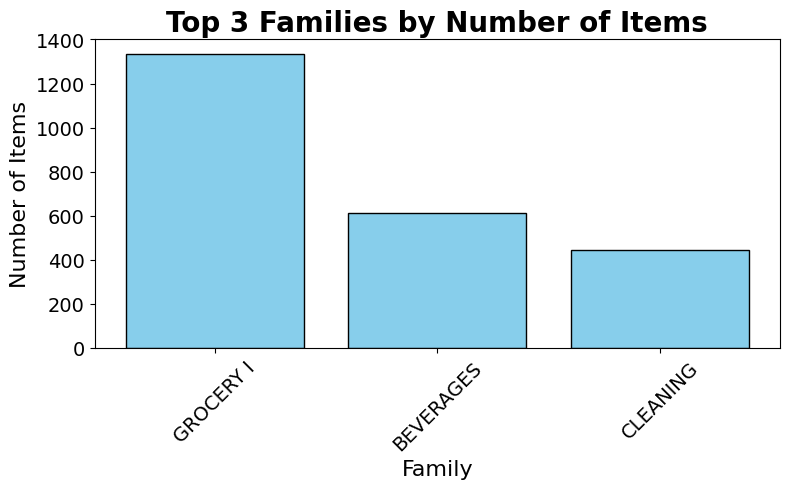

In [17]:
# Importing package
import matplotlib.pyplot as plt

# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families

# Plot the top 10 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

#### **Only taking these 3 families to analyze**

In [18]:
# Filtering the data

item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()

df_train = df_train[df_train['item_nbr'].isin(item_ids)]

## **Checking negative sales**

In [19]:
# Checking for negative sales (returns)
negative_sales = df_train[df_train['unit_sales'] < 0]

negative_sales.head()  # Viewing negative sales for analysis

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg


In [20]:
if (df_train['unit_sales'] < 0).any():
  print('there is zero sales')
else:
  print('no zero sales')

no zero sales


## **Feature Engineering df_train**

In [21]:
# convert the type
df_train['date'] = pd.to_datetime(df_train['date'])

# sort the date, format (grup 1, grup 2, urutan dlm grup)
df_train = df_train.sort_values(['store_nbr', 'item_nbr', 'date'])

# Impute basic features
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

# Rolling averages (overwrite yang NaN)
df_train['unit_sales_7d_avg'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Lag variables (important for XGBoost, RF, linear reg, NN (MLP/dense)
df_train['unit_sales_lag1'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1)
df_train['unit_sales_lag7'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7)

# Holidays
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

df_holidays_filtered = df_holidays[
    (df_holidays['date'] >= '2014-01-01') &
    (df_holidays['date'] <= '2014-03-31') &
    (
        (df_holidays['locale'] == 'National') |
        ((df_holidays['locale'] == 'Regional') & (df_holidays['locale_name'] == 'Guayas')) |
        ((df_holidays['locale'] == 'Local') & (df_holidays['locale_name'].isin(['Guayaquil', 'Salinas', 'Playas'])))
    )
]


In [22]:
# merging holidays with train

df_train = df_train.merge(
    df_holidays_filtered[['date', 'type', 'transferred']],
    on='date',
    how='left'
)

df_train['is_holiday'] = df_train['type'].notna()
df_train['is_transferred_holiday'] = df_train['transferred'].fillna(False)
df_train = df_train.drop(['type', 'transferred'], axis=1)

# Weekend
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6])

# Promotion interactions
df_train['promo_weekend'] = df_train['onpromotion'] & df_train['is_weekend']
df_train['promo_holiday'] = df_train['onpromotion'] & df_train['is_holiday']

print(df_train.head())


          id       date  store_nbr  item_nbr  unit_sales  onpromotion  year  \
0  5305742.0 2013-05-08         24     96995         1.0        False  2013   
1  6945807.0 2013-06-14         24     96995         3.0        False  2013   
2  8034773.0 2013-07-08         24     96995         2.0        False  2013   
3  8164384.0 2013-07-11         24     96995         1.0        False  2013   
4  8430231.0 2013-07-17         24     96995         1.0        False  2013   

   month  day  day_of_week  unit_sales_7d_avg  unit_sales_lag1  \
0      5    8            2               1.00              NaN   
1      6   14            4               2.00              1.0   
2      7    8            0               2.00              3.0   
3      7   11            3               1.75              2.0   
4      7   17            2               1.60              1.0   

   unit_sales_lag7  is_holiday  is_transferred_holiday  is_weekend  \
0              NaN       False                   False    

/tmp/ipython-input-3608386700.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_transferred_holiday'] = df_train['transferred'].fillna(False)


In [23]:
df_train['date'].max()

Timestamp('2017-08-15 00:00:00')

### **Filter for only Jan - Mar 2014**

In [24]:
# Filter df_train to only Jan-Mar 2014
df_train_filtered = df_train[
    (df_train['date'] >= '2014-01-01') &
    (df_train['date'] <= '2014-03-31')
].copy()

print(f'After filter: {df_train_filtered.shape}')
print(f'Period: {df_train_filtered["date"].min()} to {df_train_filtered["date"].max()}')


After filter: (12772, 18)
Period: 2014-01-01 00:00:00 to 2014-03-31 00:00:00


In [25]:
# Set date range
min_date = pd.to_datetime('2014-01-01')
max_date = pd.to_datetime('2014-03-31')

# Get full date range
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})


In [26]:
# Create all combinations
store_item_combinations = df_train_filtered[['store_nbr', 'item_nbr']].drop_duplicates()
all_combinations = store_item_combinations.merge(full_date_range, how='cross')

# Merge with filtered data
df_filled = all_combinations.merge(df_train_filtered, on=['date','store_nbr', 'item_nbr'], how='left')

In [27]:
# Fill missing values
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Replace df_train
df_train = df_filled
del df_filled

print(f'Final shape: {df_train.shape}')


Final shape: (646470, 18)


In [28]:
# checking the period
print(f' min : {df_train['date'].min()}')
print(f' max: {df_train['date'].max()}')

 min : 2014-01-01 00:00:00
 max: 2014-03-31 00:00:00


### **Flag Outlier using Zscore**

In [29]:
def calculate_store_item_zscore(group):
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group

# Calculate z-score and overwrite df_train
df_train = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train.reset_index(drop=True, inplace=True)

# Flag outliers
df_train['is_outlier'] = df_train['z_score'].abs() > 3

print(f'Period: {df_train["date"].min()} to {df_train["date"].max()}')
print(f'Total outliers: {df_train["is_outlier"].sum()}')
print(f'Shape: {df_train.shape}')

Period: 2014-01-01 00:00:00 to 2014-03-31 00:00:00
Total outliers: 10692
Shape: (646470, 20)


/tmp/ipython-input-3466649503.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


In [30]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_lag1,unit_sales_lag7,is_holiday,is_transferred_holiday,is_weekend,promo_weekend,promo_holiday,z_score,is_outlier
0,24,105577,2014-01-01,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
1,24,105577,2014-01-02,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
2,24,105577,2014-01-03,16418874.0,5.0,False,2014.0,1.0,3.0,4.0,2.428571,2.0,1.0,False,False,False,False,False,6.342507,True
3,24,105577,2014-01-04,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False
4,24,105577,2014-01-05,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,-0.173767,False


### **Handling missing values again after merging holidays, fulldate from Jan - Mar 2014 and top 3 family**

In [31]:
# 1. Basic datetime features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek


In [32]:
# 2. Onpromotion
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)


In [33]:
# 3. Sort data for rolling and lagging
df_train = df_train.sort_values(['store_nbr', 'item_nbr', 'date'])

In [34]:
# 4. Rolling averages
df_train['unit_sales_7d_avg'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

In [35]:
# 5. Lag variables
df_train['unit_sales_lag1'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).fillna(0)
df_train['unit_sales_lag7'] = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7).fillna(0)


In [36]:
# 6. Holiday features

# If is_holiday still NaN, means not holiday
df_train['is_holiday'] = df_train['is_holiday'].fillna(False)
df_train['is_transferred_holiday'] = df_train['is_transferred_holiday'].fillna(False)


/tmp/ipython-input-1636011823.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_holiday'] = df_train['is_holiday'].fillna(False)
/tmp/ipython-input-1636011823.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_transferred_holiday'] = df_train['is_transferred_holiday'].fillna(False)


In [37]:
# 7. Weekend features
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6])


In [38]:
# 8. Interaction features
df_train['promo_weekend'] = df_train['onpromotion'] & df_train['is_weekend']
df_train['promo_holiday'] = df_train['onpromotion'] & df_train['is_holiday']


In [39]:
print(df_train.isna().sum())
print(f"\nTotal NaN: {df_train.isna().sum().sum()}")

if df_train.isna().sum().sum() == 0:
    print("\n No NaN! Ready for modeling")
else:
    print("\n There are NaN!")

print(df_train.head(10))

store_nbr                      0
item_nbr                       0
date                           0
id                        633698
unit_sales                     0
onpromotion                    0
year                           0
month                          0
day                            0
day_of_week                    0
unit_sales_7d_avg              0
unit_sales_lag1                0
unit_sales_lag7                0
is_holiday                     0
is_transferred_holiday         0
is_weekend                     0
promo_weekend                  0
promo_holiday                  0
z_score                        0
is_outlier                     0
dtype: int64

Total NaN: 633698

 There are NaN!
   store_nbr  item_nbr       date          id  unit_sales  onpromotion  year  \
0         24    105577 2014-01-01         NaN         0.0        False  2014   
1         24    105577 2014-01-02         NaN         0.0        False  2014   
2         24    105577 2014-01-03  16418874.0      

## **Model 2: Prophet**

Prophet Format 📝

* ds = date column
* y = target column
* Regressors = additional features

### **Split train test**

In [40]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_lag1,unit_sales_lag7,is_holiday,is_transferred_holiday,is_weekend,promo_weekend,promo_holiday,z_score,is_outlier
0,24,105577,2014-01-01,NaN,0.0,False,2014,1,1,2,0.000000,0.0,0.0,False,False,False,False,False,-0.173767,False
1,24,105577,2014-01-02,NaN,0.0,False,2014,1,2,3,0.000000,0.0,0.0,False,False,False,False,False,-0.173767,False
2,24,105577,2014-01-03,16418874.0,5.0,False,2014,1,3,4,1.666667,0.0,0.0,False,False,False,False,False,6.342507,True
3,24,105577,2014-01-04,NaN,0.0,False,2014,1,4,5,1.250000,5.0,0.0,False,False,True,False,False,-0.173767,False
4,24,105577,2014-01-05,NaN,0.0,False,2014,1,5,6,1.000000,0.0,0.0,False,False,True,False,False,-0.173767,False


### **Making a new DataFrame consisting of timestamp and unit_sales**


In [41]:
# Reset index if date is index
if isinstance(df_train.index, pd.DatetimeIndex):
    df_train = df_train.reset_index()

# Sort by date (IMPORTANT for time series!)
df_train = df_train.sort_values('date')

In [42]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_lag1,unit_sales_lag7,is_holiday,is_transferred_holiday,is_weekend,promo_weekend,promo_holiday,z_score,is_outlier
0,24,105577,2014-01-01,NaN,0.0,False,2014,1,1,2,0.0,0.0,0.0,False,False,False,False,False,-0.173767,False
110970,26,916885,2014-01-01,NaN,0.0,False,2014,1,1,2,0.0,0.0,0.0,False,False,False,False,False,-0.105409,False
532980,36,839362,2014-01-01,NaN,0.0,False,2014,1,1,2,0.0,0.0,0.0,False,False,False,False,False,-0.149414,False
111060,26,926958,2014-01-01,NaN,0.0,False,2014,1,1,2,0.0,0.0,0.0,False,False,False,False,False,-0.146940,False
532890,36,830829,2014-01-01,NaN,0.0,False,2014,1,1,2,0.0,0.0,0.0,False,False,False,False,False,-0.146940,False


In [43]:
# Sort by date (IMPORTANT for time series!)
df_train = df_train.sort_values('date')

# Aggregate unit_sales by date to create a single time series
df_new = df_train.groupby('date')['unit_sales'].sum().reset_index()

# Rename columns to 'ds' and 'y' for Prophet
df_new.rename(columns={'date': 'ds', 'unit_sales': 'y'}, inplace=True)

print(f"\n Date range: {df_new['ds'].min()} to {df_new['ds'].max()}")
print(f" Total days: {len(df_new)} days")

df_new.head(10)


 Date range: 2014-01-01 00:00:00 to 2014-03-31 00:00:00
 Total days: 90 days


,ds,y
0,2014-01-01,34.000
1,2014-01-02,1366.000
2,2014-01-03,1605.000
3,2014-01-04,1713.000
4,2014-01-05,1438.000
5,2014-01-06,1093.000
6,2014-01-07,794.058
7,2014-01-08,1271.000
8,2014-01-09,689.000
9,2014-01-10,790.000


### **Visualization to see if the new dataframe is additive or multiplicative**


Data type of 'ds' column: datetime64[ns]
Min date in df_new: 2014-01-01 00:00:00
Max date in df_new: 2014-03-31 00:00:00


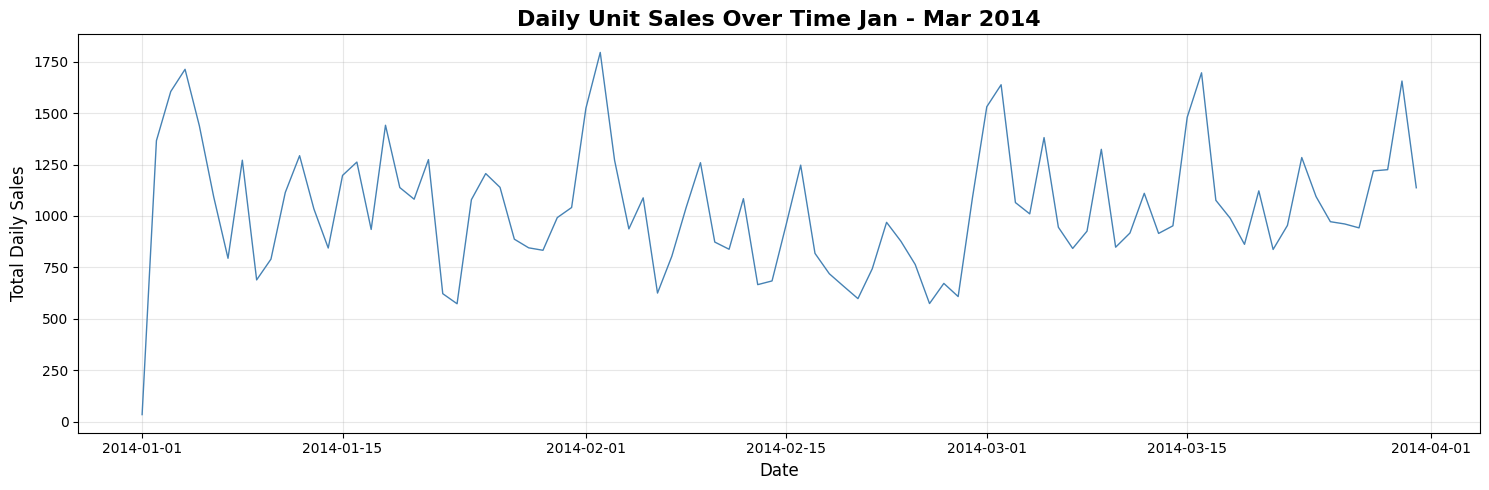

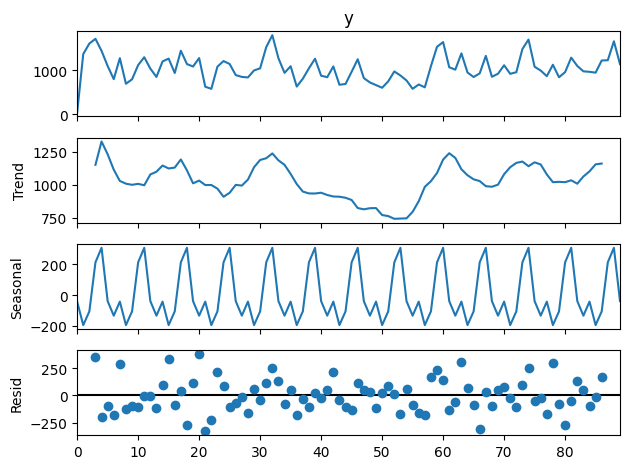

In [44]:
# Add checks for date column data type and range
print(f"Data type of 'ds' column: {df_new['ds'].dtype}")
print(f"Min date in df_new: {df_new['ds'].min()}")
print(f"Max date in df_new: {df_new['ds'].max()}")

# Create a comprehensive visualization (single plot)
fig, ax = plt.subplots(figsize=(15, 5))

# Plot 1: Full time series (Jan - Mar 2014)
ax.plot(df_new['ds'], df_new['y'], color='steelblue', linewidth=1)
ax.set_title('Daily Unit Sales Over Time Jan - Mar 2014', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Daily Sales', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_new['y'], model='additive', period=7)
decomposition.plot()
plt.show()

#### **testing which model is it : additive or multiplicative**

In [45]:
# install Prophet when its needed

!pip uninstall prophet -y
!pip install prophet

Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 110.7 MB/s eta 0:00:00


After running the installation, try creating the Prophet model again.

In [46]:
from prophet import Prophet
m = Prophet()

#### **Split to test which model (add/mult)**

In [47]:
# Time-based split: 80% train, 20% test
split = int(len(df_new) * 0.8)

train = df_new.iloc[:split]
test = df_new.iloc[split:]


#### **Train untuk testing which model (add/mult)**

In [48]:
future = pd.DataFrame({'ds': test['ds']})
future.head()

,ds
72,2014-03-14
73,2014-03-15
74,2014-03-16
75,2014-03-17
76,2014-03-18


In [49]:
# Fit model additive
m_add = Prophet(seasonality_mode='additive')
m_add.fit(train)
fc_add = m_add.predict(future)

# Fit model multiplicative
m_mul = Prophet(seasonality_mode='multiplicative')
m_mul.fit(train)
fc_mul = m_mul.predict(future)

# Evaluate both models
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_add = np.sqrt(mean_squared_error(test['y'], fc_add['yhat']))
rmse_mul = np.sqrt(mean_squared_error(test['y'], fc_mul['yhat']))

print(f"Additive RMSE: {rmse_add:.2f}")
print(f"Multiplicative RMSE: {rmse_mul:.2f}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Additive RMSE: 252.64
Multiplicative RMSE: 258.71


**Additive RMSE: 252.64**

Multiplicative RMSE: 258.71




### **Modeling Prophet for training set**

In [50]:
# Model additive
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=False,
    seasonality_mode='additive'
)

In [51]:
print(f'min : {train['ds'].min()}')
print(f'max: {train['ds'].max()}')

# 80% for training

min : 2014-01-01 00:00:00
max: 2014-03-13 00:00:00


In [52]:
# Fit + training duration

import time

t0 = time.time()
model.fit(train)               # train only for column ds,y
train_time_sec = time.time() - t0
print(f"Training time: {train_time_sec:.2f} sec")

# means there is NO year- and daily seasonality

Training time: 0.43 sec


In [53]:
# 3) Future 60 days after the end of train set

future_days = 60
future = model.make_future_dataframe(periods=future_days, freq='D', include_history=True)

forecast= model.predict(future)

print("Last hist:", train['ds'].max().date(), "| Last pred:", future['ds'].max().date())
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10))

Last hist: 2014-03-13 | Last pred: 2014-05-12
            ds         yhat  yhat_lower   yhat_upper
122 2014-05-03  1058.364153  740.178911  1388.909871
123 2014-05-04  1130.467516  795.868112  1439.363711
124 2014-05-05   789.114991  452.382064  1140.862107
125 2014-05-06   690.883414  363.932500  1030.812624
126 2014-05-07   712.847842  396.413724  1047.613361
127 2014-05-08   648.214540  343.010188   988.555882
128 2014-05-09   762.051138  466.738372  1128.396883
129 2014-05-10  1043.617676  698.070496  1358.662016
130 2014-05-11  1115.721038  768.312160  1438.145036
131 2014-05-12   774.368514  438.068806  1111.053603


In [54]:
# Prediction time
t1 = time.time()
forecast = model.predict(future)
pred_time_sec = time.time() - t1

print(f"Training time: {train_time_sec:.2f} sec | Prediction time: {pred_time_sec:.2f} sec")

Training time: 0.43 sec | Prediction time: 0.13 sec


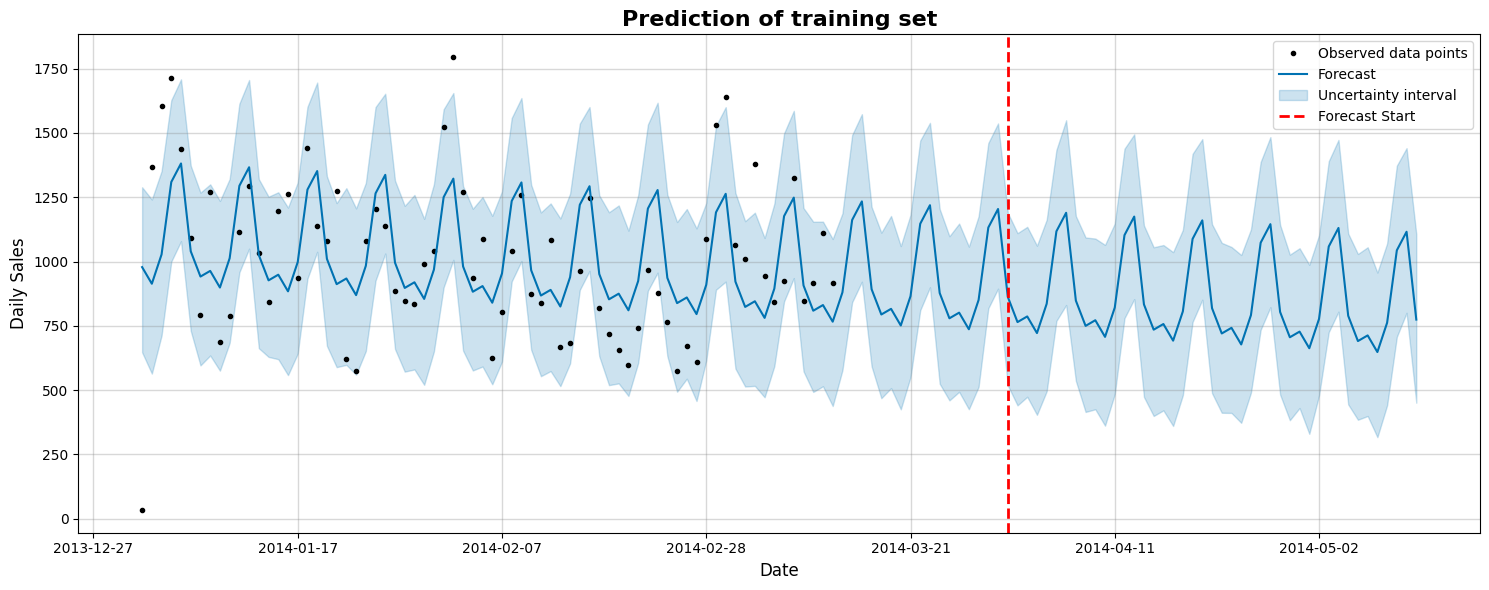

In [55]:
fig = model.plot(forecast, figsize=(15,6))
plt.title('Prediction of training set', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Sales', fontsize=12)

# Add a vertical line to separate historical from forecast
plt.axvline(x=df_new['ds'].max(), color='red', linestyle='--', linewidth=2, label='Forecast Start')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### **Evaluation Metric**

In [56]:
# Take prediction result that has a match test's date
fc_test = forecast[forecast['ds'].isin(test['ds'])][['ds', 'yhat']].reset_index(drop=True)


In [57]:
# Merge with the original test set
comparison = test.merge(fc_test, on='ds', how='left')
comparison = comparison.dropna()   # to make it not error if there is no match date


In [58]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prophet Evaluation
y_true = comparison['y']
y_pred = comparison['yhat']

mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
bias_prophet = np.mean(y_pred - y_true)

print("Prophet Evaluation Metrics:")
print(f" - MAE  : {mae_prophet:.2f}")
print(f" - RMSE : {rmse_prophet:.2f}")
print(f" - Bias : {bias_prophet:.2f}")


Prophet Evaluation Metrics:
 - MAE  : 216.40
 - RMSE : 252.64
 - Bias : -191.83


### **Visualization of Prediction vs Actual**

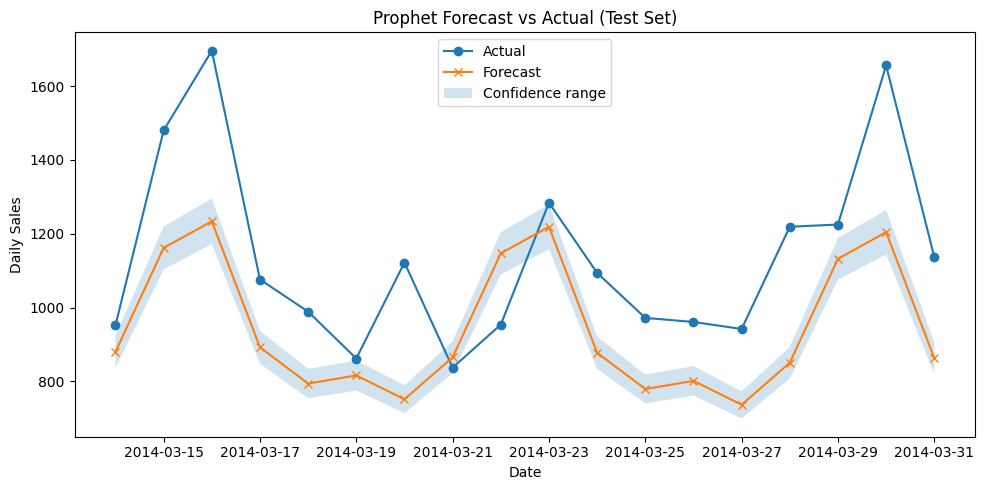

In [59]:
plt.figure(figsize=(10,5))
plt.plot(comparison['ds'], comparison['y'], label='Actual', marker='o')
plt.plot(comparison['ds'], comparison['yhat'], label='Forecast', marker='x')
plt.fill_between(comparison['ds'],
                 comparison['yhat'] - (comparison['yhat']*0.05),
                 comparison['yhat'] + (comparison['yhat']*0.05),
                 alpha=0.2, label='Confidence range')
plt.title('Prophet Forecast vs Actual (Test Set)')
plt.xlabel('Date'); plt.ylabel('Daily Sales')
plt.legend()
plt.tight_layout()
plt.show()